# Estadística Aplicada

Segundo exámen parcial

Paulina Quiroz Sánchez 1723927

Grupo 41



El Banco de la Ilusión (BIL) ha reconocido la necesidad de revisar sus políticas de otorgamiento de préstamos.

En este contexto, se te ha designado para llevar a cabo un análisis integral de la situación.

Se utilizará una base de datos proporcionada por el banco, que contiene información sobre los créditos y préstamos otorgados a distintos clientes.

La base de datos proporcionada contiene información relevante sobre cada préstamo.
La variable "crédito_pagado" toma el valor de 1 si el cliente ha pagado completamente el préstamo y 0 si no lo ha hecho o aún no ha terminado de pagar. Además, se dispone de información sobre el tiempo en meses que lleva pagar completamente el préstamo, registrado en la variable "meses", y el monto del préstamo otorgado en euros, registrado en la variable "cantidad"

In [165]:
# Importa las librerias de numpy, python y matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [166]:
datos = pd.read_csv("https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv")

datos.head()

,saldo_cuenta,meses,historia_crediticia,uso,cantidad,saldo_cuenta_ahorro,años_trabajando,tasa_de_interes,genero_estado_civil,aval,...,activos,edad,planes_de_pago,casa,numero_creditos,situacion_laboral,dependientes_economicos,telefono,extranjero,credito_pagado
0,menor_a_cero,6,no_ha_pagado,TV,1169,NaN,mas_de_7,4,hombre_soltero,NaN,...,bienes_raices,67,NaN,propia,2,gobierno,1,1,1,1
1,cero_a_200,48,pago_algun_credito,TV,5951,menor_100,1_a_4,2,mujer_no_soltera,NaN,...,bienes_raices,22,NaN,propia,1,gobierno,1,0,1,0
2,sin_cuenta,12,no_ha_pagado,colegiaturas,2096,menor_100,4_a_7,2,hombre_soltero,NaN,...,bienes_raices,49,NaN,propia,1,obrero,2,0,1,1
3,menor_a_cero,42,pago_algun_credito,mobiliario,7882,menor_100,4_a_7,2,hombre_soltero,aval,...,seguro_vida,45,NaN,prestada,1,gobierno,2,0,1,1
4,menor_a_cero,24,pago_retrasado,coche_nuevo,4870,menor_100,1_a_4,3,hombre_soltero,NaN,...,sin_activos,53,NaN,prestada,2,gobierno,2,0,1,0


## Análisis exploratorio

a) Cuantas variables y cuantas observaciones tienen la base

In [167]:
num_variables = len(datos.columns)
num_observaciones = len(datos.index)

print('La base de datos tiene :' , num_variables,' columnas')
print('La base de datos contiene:' , num_observaciones,' observaciones')

La base de datos tiene : 21  columnas
La base de datos contiene: 1000  observaciones


b) Cuál es el monto promedio de los créditos otorgados por el banco

In [168]:
monto_promedio = datos['cantidad'].mean()
print(f'El monto promedio de los créditos otorgados por el banco es: {monto_promedio:.2f} euros')


El monto promedio de los créditos otorgados por el banco es: 3271.26 euros


c) Cuál es el tiempo promedio que se tardaron en pagar el préstamo los
que pagaron el préstamo en su totalidad

In [169]:
prestamos_pagados = datos[datos['credito_pagado'] == 1]
tiempo_promedio = prestamos_pagados['meses'].mean()
print(f'El tiempo promedio para pagar el préstamo en su totalidad es de: {tiempo_promedio:.2f} meses')

El tiempo promedio para pagar el préstamo en su totalidad es de: 19.21 meses


d) Cuál es la tasa de interés promedio otorgada por el banco

In [170]:
tasa_interes_promedio = datos['tasa_de_interes'].mean()
print(f'La tasa de interés promedio otorgada por el banco es de: {tasa_interes_promedio:.2f}%')

La tasa de interés promedio otorgada por el banco es de: 2.97%


e) Cuál es el monto promedio y la tasa de interés promedio de los que ya
pagaron

In [171]:
prestamos_pagados = datos[datos['credito_pagado'] == 1]
monto_promedio_pagados = prestamos_pagados['cantidad'].mean()
tasa_interes_promedio_pagados = prestamos_pagados['tasa_de_interes'].mean()
print(f'El monto promedio de los préstamos pagados es de: {monto_promedio_pagados:.2f} euros')
print(f'La tasa de interés promedio de los préstamos pagados es de: {tasa_interes_promedio_pagados:.2f}%')

El monto promedio de los préstamos pagados es de: 2985.46 euros
La tasa de interés promedio de los préstamos pagados es de: 2.92%


f) Cuál es el monto promedio y la tasa de interés promedio de los que no
han pagado

In [172]:
prestamos_no_pagados = datos[datos['credito_pagado'] == 0]
monto_promedio_no_pagados = prestamos_no_pagados['cantidad'].mean()
tasa_interes_promedio_no_pagados = prestamos_no_pagados['tasa_de_interes'].mean()
print(f'El monto promedio de los préstamos no pagados es de: {monto_promedio_no_pagados:.2f} euros')
print(f'La tasa de interés promedio de los préstamos no pagados es de: {tasa_interes_promedio_no_pagados:.2f}%')

El monto promedio de los préstamos no pagados es de: 3938.13 euros
La tasa de interés promedio de los préstamos no pagados es de: 3.10%


## Estime un modelo de Kaplan-meier

In [173]:
!pip install lifelines

In [174]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

kmf.fit(durations=datos['meses'], event_observed=datos['credito_pagado'])

mediana_tiempo = kmf.median_survival_time_
print(f'La mediana del tiempo es de: {mediana_tiempo} meses')

La mediana del tiempo es de: 24.0 meses


Esto significa que se espera que aproximadamente la mitad de los clientes hayan pagado completamente sus préstamos en un período de 24 meses.

b) es mayor/menor que el tiempo promedio del inciso 1c

In [175]:
if tiempo_promedio > mediana_tiempo:
    print("El tiempo promedio es mayor que la mediana.")
elif tiempo_promedio < mediana_tiempo:
    print("El tiempo promedio es menor que la mediana.")
else:
    print("El tiempo promedio es igual a la mediana.")

El tiempo promedio es menor que la mediana.


Es decir, en promedio, los clientes que pagaron en su totalidad tomaron menos tiempo en promedio que el tiempo mediano estimado por el modelo de Kaplan-Meier.

## 3.Determine si el riesgo de que el préstamo se pague en su totalidad es constante, creciente, decreciente, o tipo log-normal respecto al tiempo

#Modelo Exponencial

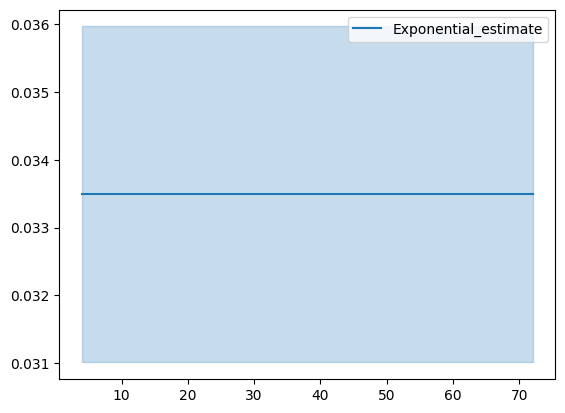

In [176]:
from lifelines import ExponentialFitter

ex1 = ExponentialFitter().fit(datos['meses'], datos['credito_pagado'])

ex1.plot_hazard();



<Axes: >

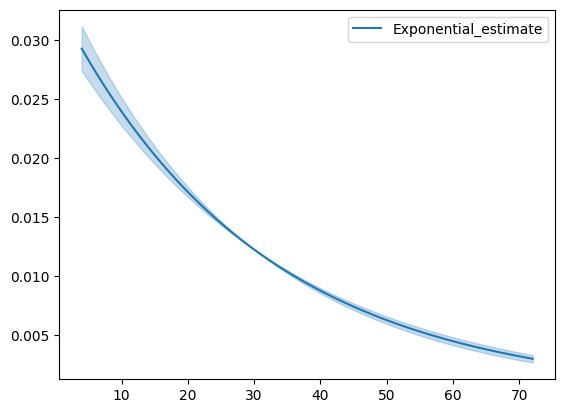

In [177]:
ex1.plot_density()

<Axes: >

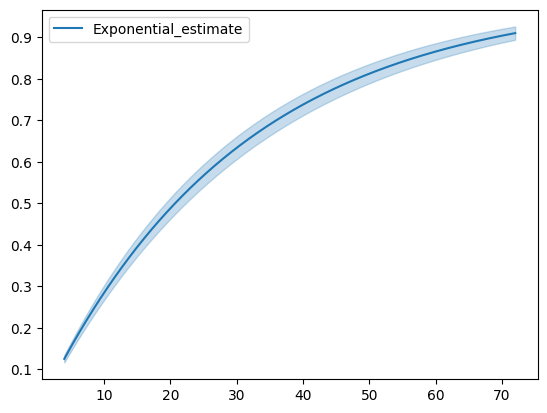

In [178]:
ex1.plot_cumulative_density()

In [179]:
ex1.print_summary()

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 1000 total observations, 300 right-censored observations>
   number of observations = 1000
number of events observed = 700
           log-likelihood = -3077.60
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  29.86       1.13            27.65            32.07

          cmp to     z      p   -log2(p)
lambda_     0.00 26.46 <0.005     510.00
---
AIC = 6157.19

#Modelo Weibull

In [180]:
from lifelines import WeibullFitter

In [181]:
weib1 = WeibullFitter().fit(datos['meses'], datos['credito_pagado'])

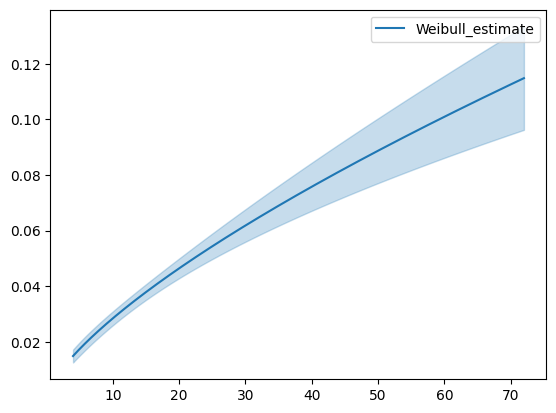

In [182]:
weib1.plot_hazard();

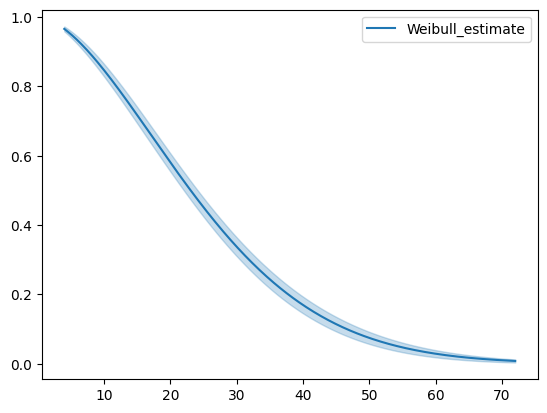

In [183]:
weib1.plot_survival_function();

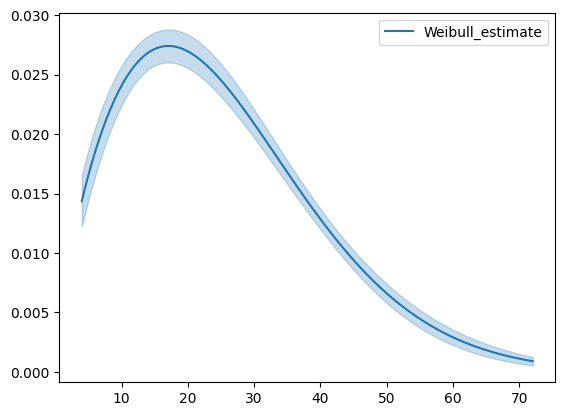

In [184]:
weib1.plot_density();

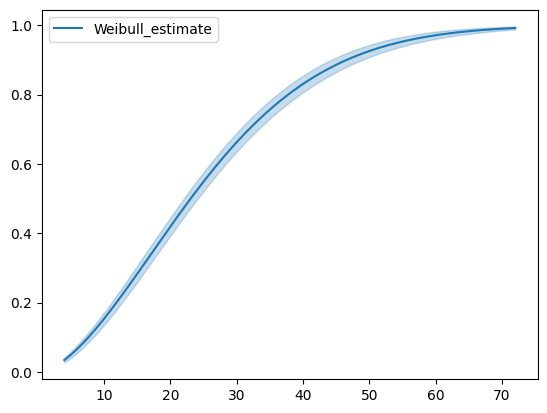

In [185]:
weib1.plot_cumulative_density();

In [186]:
weib1.print_summary()

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 1000 total observations, 300 right-censored observations>
   number of observations = 1000
number of events observed = 700
           log-likelihood = -2948.49
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  28.58       0.63            27.34            29.82
rho_      1.71       0.05             1.61             1.80

          cmp to     z      p   -log2(p)
lambda_     1.00 43.56 <0.005        inf
rho_        1.00 14.26 <0.005     150.91
---
AIC = 5900.98

#Modelo Log-Normal

In [187]:
from lifelines import LogNormalFitter

In [188]:
logn1 = LogNormalFitter().fit(datos['meses'], datos['credito_pagado'])

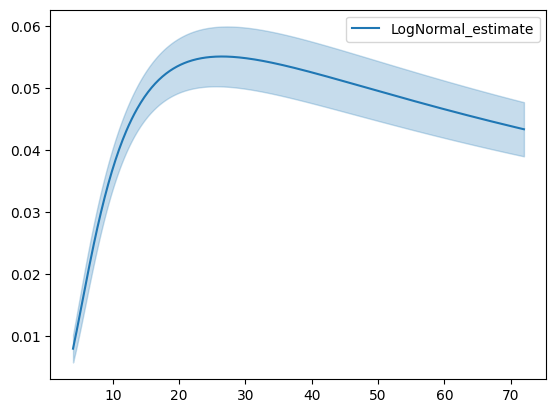

In [189]:
logn1.plot_hazard();

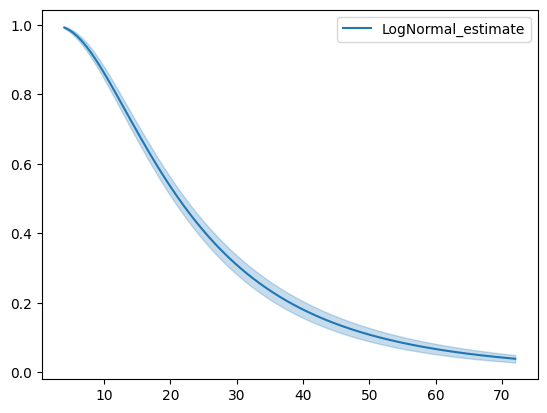

In [190]:
logn1.plot_survival_function();

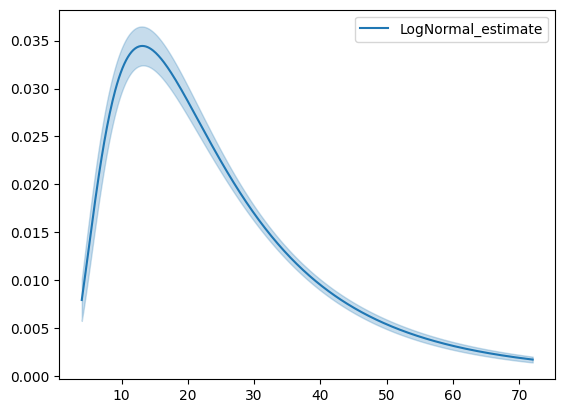

In [191]:
logn1.plot_density();

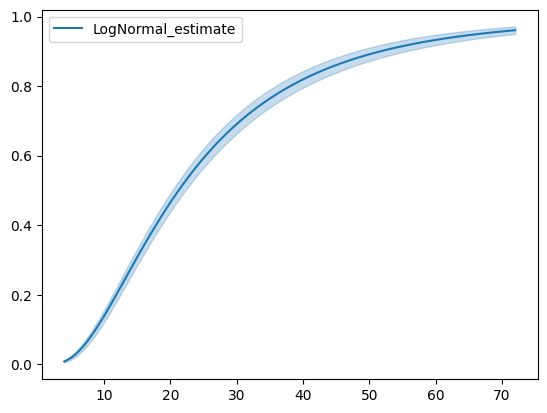

In [192]:
logn1.plot_cumulative_density();

In [193]:
logn1.print_summary()

<lifelines.LogNormalFitter:"LogNormal_estimate", fitted with 1000 total observations, 300 right-censored observations>
   number of observations = 1000
number of events observed = 700
           log-likelihood = -2904.87
               hypothesis = mu_ != 0, sigma_ != 1

---
         coef   se(coef)   coef lower 95%   coef upper 95%
mu_      3.06       0.02             3.01             3.10
sigma_   0.69       0.02             0.66             0.73

         cmp to      z      p   -log2(p)
mu_        0.00 128.38 <0.005        inf
sigma_     1.00 -16.14 <0.005     192.30
---
AIC = 5813.75

In [194]:
print(f'Exponencial : {ex1.AIC_.round(3)}, Weibull : {weib1.AIC_.round(3)}, Log-normal : {logn1.AIC_.round(3)}')

Exponencial : 6157.195, Weibull : 5900.981, Log-normal : 5813.747


El mejor modelo es exponencial, donde el riesgo en constante en el tiempo.

#Estimar un modelo de Cox para ver qué factores influyen sobre el riesgo de que el préstamo se pague en su totalidad

In [195]:
from lifelines import CoxPHFitter

###a) A parte de “tasa de interes” y “cantidad”, elige otras cuatro variables que creas que afectan el riesgo del evento

Las cuatro variables que elegí son "historia_crediticia", "años_trabajando", "dependientes_economicos", y "situacion_laboral".

### b) Di si cada una de las 6 variables que elegiste, aumentan/disminuyen el riesgo del evento y por qué

**Historia Crediticia**: Una buena historia crediticia podría indicar que el solicitante tiene un historial de pago confiable, lo que podría disminuir el riesgo de incumplimiento. Por lo tanto, una buena historia crediticia podría estar asociada con un menor riesgo del evento.

**Años trabajando**: Si un solicitante ha estado trabajando durante un período prolongado, esto podría indicar estabilidad financiera y una mayor capacidad para hacer pagos, lo que podría estar asociado con un menor riesgo de incumplimiento. Por lo tanto, más años de trabajo podrían estar asociados con un menor riesgo del evento.

**Número de dependientes economicos**: Un mayor número de dependientes económicos puede aumentar la carga financiera de un solicitante, lo que podría estar asociado con un mayor riesgo de incumplimiento. Por lo tanto, un mayor número de dependientes podría estar asociado con un mayor riesgo del evento.

**Situación laboral**: La situación laboral de un solicitante (por ejemplo, estar desempleado) puede indicar una mayor inestabilidad financiera y, por lo tanto, puede aumentar el riesgo de incumplimiento. Por lo tanto, ciertas situaciones laborales podrían estar asociadas con un mayor riesgo del evento.

**Tasa de interés**: Una tasa de interés alta podría aumentar la carga financiera para el solicitante y, por lo tanto, estar asociada con un mayor riesgo de incumplimiento. Por lo tanto, una tasa de interés alta podría estar asociada con un mayor riesgo del evento.

**Cantidad**: Una mayor cantidad de préstamo podría aumentar la carga financiera para el solicitante y, por lo tanto, estar asociada con un mayor riesgo de incumplimiento. Por lo tanto, una mayor cantidad de préstamo podría estar asociada con un mayor riesgo del evento.


### c)Realiza las transformaciones adecuadas para utilizar las variables en un modelo de cox

In [196]:
datos.isnull().sum()

saldo_cuenta                 0
meses                        0
historia_crediticia          0
uso                          0
cantidad                     0
saldo_cuenta_ahorro        183
años_trabajando              0
tasa_de_interes              0
genero_estado_civil          0
aval                       948
años_actual_domicilio        0
activos                      0
edad                         0
planes_de_pago             814
casa                         0
numero_creditos              0
situacion_laboral            0
dependientes_economicos      0
telefono                     0
extranjero                   0
credito_pagado               0
dtype: int64

In [197]:
datos = datos.dropna()

In [198]:
datos.isnull().sum()

saldo_cuenta               0
meses                      0
historia_crediticia        0
uso                        0
cantidad                   0
saldo_cuenta_ahorro        0
años_trabajando            0
tasa_de_interes            0
genero_estado_civil        0
aval                       0
años_actual_domicilio      0
activos                    0
edad                       0
planes_de_pago             0
casa                       0
numero_creditos            0
situacion_laboral          0
dependientes_economicos    0
telefono                   0
extranjero                 0
credito_pagado             0
dtype: int64

In [199]:
datos.duplicated().sum()

0

In [200]:
datos

,saldo_cuenta,meses,historia_crediticia,uso,cantidad,saldo_cuenta_ahorro,años_trabajando,tasa_de_interes,genero_estado_civil,aval,...,activos,edad,planes_de_pago,casa,numero_creditos,situacion_laboral,dependientes_economicos,telefono,extranjero,credito_pagado
220,cero_a_200,12,pago_algun_credito,TV,625,menor_100,menor_a_1,4,hombre_divorciado,aval,...,bienes_raices,26,bancario,propia,1,obrero,1,0,1,1
252,cero_a_200,30,pago_algun_credito,coche_nuevo,2150,menor_100,1_a_4,4,mujer_no_soltera,aval,...,sin_activos,24,bancario,propia,1,gobierno,1,0,1,0
465,menor_a_cero,24,pago_algun_credito,coche_usado,2924,menor_100,1_a_4,3,hombre_soltero,aval,...,sin_activos,63,bancario,propia,1,gobierno,2,1,1,1
561,menor_a_cero,24,pago_todos,TV,1546,menor_100,4_a_7,4,hombre_soltero,aval,...,otro_tipo,24,bancario,renta,1,obrero,1,0,1,0
580,cero_a_200,18,no_ha_pagado,coche_nuevo,1056,menor_100,mas_de_7,3,hombre_soltero,aval,...,bienes_raices,30,bancario,propia,2,gobierno,1,0,1,0
613,menor_a_cero,24,pago_todos,coche_usado,3632,menor_100,1_a_4,1,mujer_no_soltera,aval,...,otro_tipo,22,bancario,renta,1,gobierno,1,0,0,1
765,cero_a_200,12,pago_algun_credito,TV,1155,menor_100,mas_de_7,3,hombre_divorciado,aval,...,bienes_raices,40,bancario,propia,2,obrero,1,0,1,1
801,cero_a_200,18,no_ha_pagado,TV,1795,menor_100,mas_de_7,3,mujer_no_soltera,aval,...,bienes_raices,48,bancario,renta,2,obrero,1,1,1,1
811,cero_a_200,6,pago_algun_credito,TV,484,menor_100,4_a_7,3,hombre_divorciado,aval,...,bienes_raices,28,bancario,propia,1,obrero,1,0,1,1
850,menor_a_cero,20,no_ha_pagado,coche_nuevo,2235,menor_100,1_a_4,4,hombre_divorciado,aval,...,seguro_vida,33,bancario,renta,2,gobierno,1,0,0,0


In [201]:
datos.dtypes

saldo_cuenta               object
meses                       int64
historia_crediticia        object
uso                        object
cantidad                    int64
saldo_cuenta_ahorro        object
años_trabajando            object
tasa_de_interes             int64
genero_estado_civil        object
aval                       object
años_actual_domicilio       int64
activos                    object
edad                        int64
planes_de_pago             object
casa                       object
numero_creditos             int64
situacion_laboral          object
dependientes_economicos     int64
telefono                    int64
extranjero                  int64
credito_pagado              int64
dtype: object

In [202]:
categoricas = datos.select_dtypes(include=['object'])

In [203]:
datos = pd.get_dummies(datos, columns=categoricas.columns, drop_first=True)

In [204]:
datos

,meses,cantidad,tasa_de_interes,años_actual_domicilio,edad,numero_creditos,dependientes_economicos,telefono,extranjero,credito_pagado,...,años_trabajando_4_a_7,años_trabajando_mas_de_7,años_trabajando_menor_a_1,genero_estado_civil_hombre_soltero,genero_estado_civil_mujer_no_soltera,activos_otro_tipo,activos_seguro_vida,activos_sin_activos,casa_renta,situacion_laboral_obrero
220,12,625,4,1,26,1,1,0,1,1,...,0,0,1,0,0,0,0,0,0,1
252,30,2150,4,2,24,1,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
465,24,2924,3,4,63,1,2,1,1,1,...,0,0,0,1,0,0,0,1,0,0
561,24,1546,4,4,24,1,1,0,1,0,...,1,0,0,1,0,1,0,0,1,1
580,18,1056,3,3,30,2,1,0,1,0,...,0,1,0,1,0,0,0,0,0,0
613,24,3632,1,4,22,1,1,0,0,1,...,0,0,0,0,1,1,0,0,1,0
765,12,1155,3,3,40,2,1,0,1,1,...,0,1,0,0,0,0,0,0,0,1
801,18,1795,3,4,48,2,1,1,1,1,...,0,1,0,0,1,0,0,0,1,1
811,6,484,3,3,28,1,1,0,1,1,...,1,0,0,0,0,0,0,0,0,1
850,20,2235,4,2,33,2,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [205]:
estadisticas_descriptivas = datos.describe()

In [206]:
estadisticas_descriptivas

,meses,cantidad,tasa_de_interes,años_actual_domicilio,edad,numero_creditos,dependientes_economicos,telefono,extranjero,credito_pagado,...,años_trabajando_4_a_7,años_trabajando_mas_de_7,años_trabajando_menor_a_1,genero_estado_civil_hombre_soltero,genero_estado_civil_mujer_no_soltera,activos_otro_tipo,activos_seguro_vida,activos_sin_activos,casa_renta,situacion_laboral_obrero
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,18.545455,1838.818182,3.090909,3.090909,34.636364,1.363636,1.090909,0.272727,0.818182,0.545455,...,0.181818,0.363636,0.090909,0.363636,0.272727,0.181818,0.181818,0.181818,0.454545,0.454545
std,6.875517,987.013558,0.943880,1.044466,12.690727,0.504525,0.301511,0.467099,0.404520,0.522233,...,0.404520,0.504525,0.301511,0.504525,0.467099,0.404520,0.404520,0.404520,0.522233,0.522233
min,6.000000,484.000000,1.000000,1.000000,22.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,1105.500000,3.000000,2.500000,25.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,1795.000000,3.000000,3.000000,30.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,24.000000,2430.000000,4.000000,4.000000,41.500000,2.000000,1.000000,0.500000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000
max,30.000000,3632.000000,4.000000,4.000000,63.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [207]:
datos.dtypes

meses                                     int64
cantidad                                  int64
tasa_de_interes                           int64
años_actual_domicilio                     int64
edad                                      int64
numero_creditos                           int64
dependientes_economicos                   int64
telefono                                  int64
extranjero                                int64
credito_pagado                            int64
saldo_cuenta_menor_a_cero                 uint8
historia_crediticia_pago_algun_credito    uint8
historia_crediticia_pago_todos            uint8
uso_coche_nuevo                           uint8
uso_coche_usado                           uint8
años_trabajando_4_a_7                     uint8
años_trabajando_mas_de_7                  uint8
años_trabajando_menor_a_1                 uint8
genero_estado_civil_hombre_soltero        uint8
genero_estado_civil_mujer_no_soltera      uint8
activos_otro_tipo                       

In [209]:
cphf = CoxPHFitter().fit(datos, 'meses', 'credito_pagado')
cphf.print_summary()

/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:992: ConvergenceWarning: Your dataset has more variables than samples. Even with a penalizer (which you must use), convergence is not guaranteed.

  warnings.warn(warning_text, ConvergenceWarning)
/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1122: ConvergenceWarning: Column activos_seguro_vida have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['credito_pagado'].astype(bool)
>>> print(df.loc[events, 'activos_seguro_vida'].var())
>>> print(df.loc[~events, 'activos_seguro_vida'].var())

A very low variance means that the column activos_seguro_vida completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), Conver

ConvergenceError: ignored